2. 성별(X : sex)에 따라 매출(y:amt)에 영향이 있지 않다.(회귀분석)
- 귀무가설(H₀): 성별은 매출에 유의미한 영향을 미치지 않는다. (성별의 회귀계수 = 0)
- 대립가설(H₁): 성별은 매출에 유의미한 영향을 미친다. (성별의 회귀계수 ≠ 0)

In [2]:
import pandas as pd
import os

In [9]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pymysql
import pandas as pd
import statsmodels.api as sm
from dotenv import load_dotenv

In [13]:
load_dotenv()

conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    database=os.getenv("DB_DATABASE"),
    charset='utf8mb4'
)

In [54]:
query = """
SELECT
    t.gender,
    t.transaction_amount,
    t.day_of_week
FROM card_transaction t
JOIN district d ON t.district_code = d.district_id
JOIN weather w ON t.transaction_date = w.weather_date AND t.district_code = w.district_id
"""

In [60]:
df = pd.read_sql("SELECT day_of_week, gender, transaction_amount FROM card_transaction", conn)

C:\Users\USER\AppData\Local\Temp\ipykernel_17044\906701302.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT day_of_week, gender, transaction_amount FROM card_transaction", conn)


In [61]:
print(df.columns.tolist())

['day_of_week', 'gender', 'transaction_amount']


In [62]:
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [63]:
print(df.columns)

Index(['day_of_week', 'transaction_amount', 'gender_M'], dtype='object')


In [64]:
X = sm.add_constant(df[['gender_M']])  # 성별만 독립변수
y = df['transaction_amount']

In [66]:
print(X.dtypes)
print(y.dtypes)

const       float64
gender_M       bool
dtype: object
int64


In [67]:
X = X.astype(float)
y = y.astype(float)

In [68]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     transaction_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.55
Date:                Fri, 30 May 2025   Prob (F-statistic):           0.000396
Time:                        14:44:03   Log-Likelihood:            -2.3176e+07
No. Observations:             1603322   AIC:                         4.635e+07
Df Residuals:                 1603320   BIC:                         4.635e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.786e+05    521.631    342.466      0.0

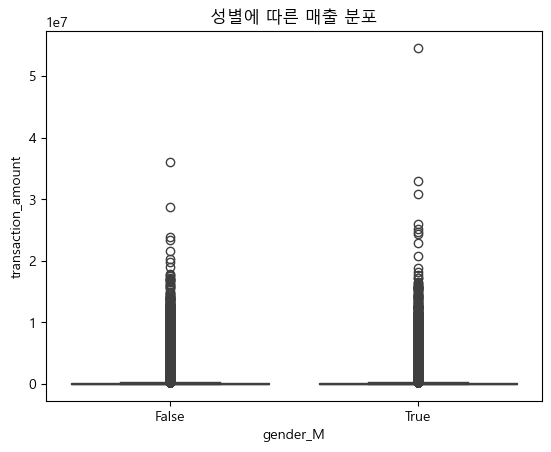

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(x='gender_M', y='transaction_amount', data=df)
plt.title('성별에 따른 매출 분포')
plt.show()

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [72]:
# 성별별 평균 매출 계산
mean_sales_by_gender = df.groupby('gender_M')['transaction_amount'].mean().reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_17044\2751885074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender_M', y='transaction_amount', data=mean_sales_by_gender, palette='Set2')


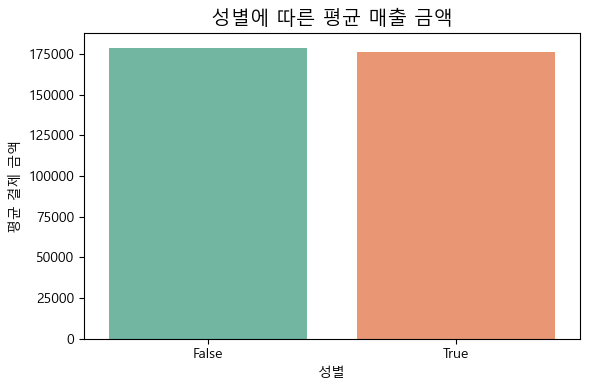

In [74]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender_M', y='transaction_amount', data=mean_sales_by_gender, palette='Set2')
plt.title('성별에 따른 평균 매출 금액', fontsize=14)
plt.xlabel('성별')
plt.ylabel('평균 결제 금액')
plt.tight_layout()
plt.show()

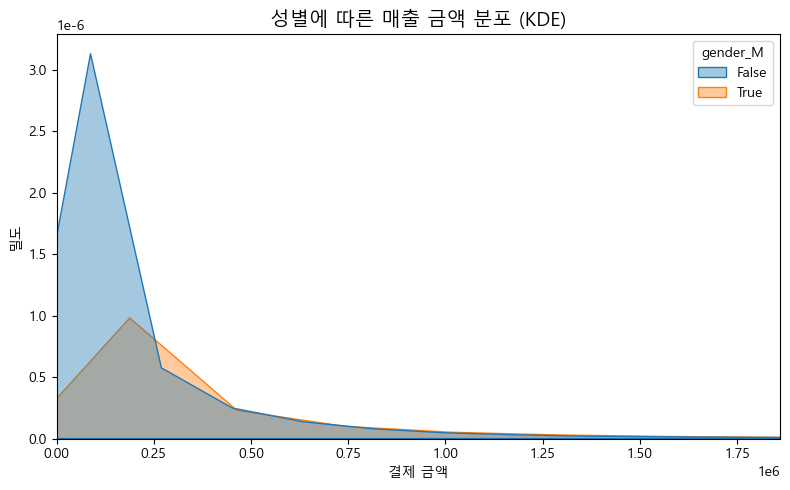

In [75]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='transaction_amount', hue='gender_M', common_norm=False, fill=True, alpha=0.4)
plt.xlim(0, df['transaction_amount'].quantile(0.99))  # 상위 1% 제거해 보기 좋게
plt.title('성별에 따른 매출 금액 분포 (KDE)', fontsize=14)
plt.xlabel('결제 금액')
plt.ylabel('밀도')
plt.tight_layout()
plt.show()

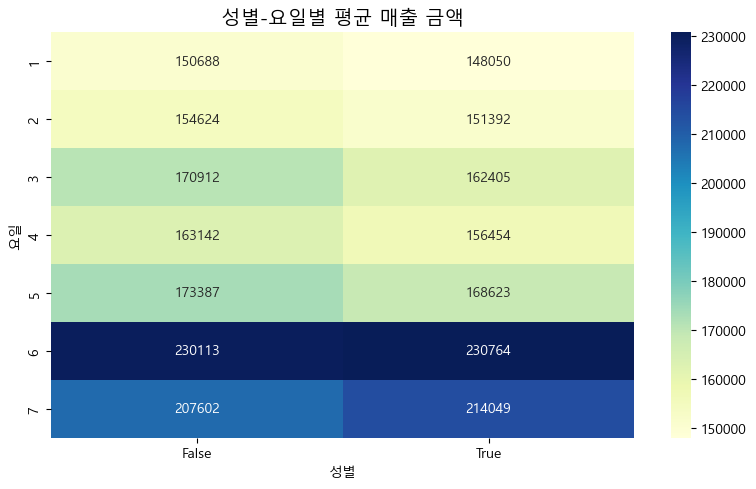

In [76]:
# 요일 컬럼이 숫자면 문자열로 변환
df['day_of_week'] = df['day_of_week'].astype(str)

pivot = df.pivot_table(index='day_of_week', columns='gender_M', values='transaction_amount', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('성별-요일별 평균 매출 금액', fontsize=14)
plt.xlabel('성별')
plt.ylabel('요일')
plt.tight_layout()
plt.show()
